In [1]:
from RD_FoM import *

In [2]:
%matplotlib inline

In [17]:
Sh_detector=np.loadtxt('../psd/S_h_scird.dat')
Sh_detector[:,1]=(Sh_detector[:,1])/2
Sh_detector=interp1d(Sh_detector[:,0],Sh_detector[:,1],bounds_error=False,fill_value=np.inf)

In [18]:
Sh_detector=PSD_Analytic

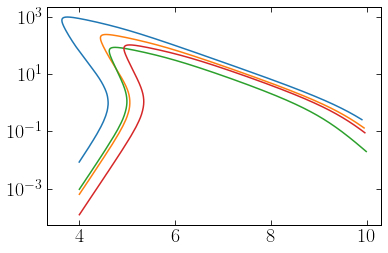

In [19]:
threshold=8
q=2

z_1Gpc=z_at_distance(1)
logMz_list=np.linspace(4,10,601)


# additional factor if the PSD is sky-angle averaged
fac=np.sqrt(5)

snr_list_1Gpc_22=fac*snr(10**logMz_list,z_1Gpc,q,Sh_detector,mode='22')
snr_list_1Gpc_33=fac*snr(10**logMz_list,z_1Gpc,q,Sh_detector,mode='33')
snr_list_1Gpc_21=fac*snr(10**logMz_list,z_1Gpc,q,Sh_detector,mode='21')
snr_list_1Gpc_44=fac*snr(10**logMz_list,z_1Gpc,q,Sh_detector,mode='44')

hor_22=np.transpose([logMz_list-np.log10(1+z_at_distance(snr_list_1Gpc_22/threshold)),
                     z_at_distance(snr_list_1Gpc_22/threshold)])

hor_33=np.transpose([logMz_list-np.log10(1+z_at_distance(snr_list_1Gpc_33/threshold)),
                     z_at_distance(snr_list_1Gpc_33/threshold)])

hor_21=np.transpose([logMz_list-np.log10(1+z_at_distance(snr_list_1Gpc_21/threshold)),
                     z_at_distance(snr_list_1Gpc_21/threshold)])

hor_44=np.transpose([logMz_list-np.log10(1+z_at_distance(snr_list_1Gpc_44/threshold)),
                     z_at_distance(snr_list_1Gpc_44/threshold)])
                     



plt.plot(hor_22[:,0],hor_22[:,1])
plt.plot(hor_33[:,0],hor_33[:,1])
plt.plot(hor_21[:,0],hor_21[:,1])
plt.plot(hor_44[:,0],hor_44[:,1])
plt.yscale('log')

In [20]:
def M_range(z=1,q=2,Sh_detector=PSD_Analytic,mode='22', f_low=1e-6, snr_threshold=8):

    def func(logM): return fac*snr(10**logM,z,q,Sh_detector,mode=mode)-snr_threshold
    logM_Min=scipy.optimize.brentq(func, 4, 7)
    logM_Max=scipy.optimize.brentq(func,7, 10)
    
    if mode == '22': qnm=qnm22
    elif mode== '33': qnm=qnm33
    elif mode== '44': qnm=qnm44
    elif mode== '21': qnm=qnm21
    else:
        print('mode not available')
        return []

    logM_cut=np.log10(qnm(remnant_spin(q))[0]/(2*np.pi*f_low*MS*(1+z)))

    logM_Max=np.minimum(logM_Max,logM_cut)
    return [10**logM_Min, 10**logM_Max]
def pretty_print(a, format_string ='{0:.1e}'):
    return [format_string.format(i) for i in a]

In [21]:
[[modes,pretty_print(M_range(mode=modes, f_low=1e-4))] for modes in ['22','33', '21', '44']]

[['22', ['4.8e+04', '8.2e+07']],
 ['33', ['1.4e+05', '1.3e+08']],
 ['21', ['1.2e+05', '7.2e+07']],
 ['44', ['2.6e+05', '1.8e+08']]]

In [22]:
[[modes,pretty_print(M_range(mode=modes, f_low=2e-5))] for modes in ['22','33', '21', '44']]


[['22', ['4.8e+04', '4.1e+08']],
 ['33', ['1.4e+05', '6.5e+08']],
 ['21', ['1.2e+05', '3.3e+08']],
 ['44', ['2.6e+05', '8.8e+08']]]

In [23]:
[[modes, pretty_print(M_range(mode=modes, f_low=1e-6))] for modes in ['22','33', '21', '44']]


[['22', ['4.8e+04', '2.0e+09']],
 ['33', ['1.4e+05', '1.2e+09']],
 ['21', ['1.2e+05', '3.3e+08']],
 ['44', ['2.6e+05', '9.4e+08']]]

In [24]:
def trimmed_Mcut(logM_H, Z_H, logMzCut):
    logMCut=logMzCut-np.log10(1+Z_H)
    logM_trim=logM_H[np.argmin(np.abs(logM_H-logMCut))]
    
    zcutoff_list=10**np.linspace(-3,4,601)
    logMCut=logMzCut-np.log10(1+zcutoff_list)

    return logMCut[logMCut>logM_trim], zcutoff_list[logMCut>logM_trim] 

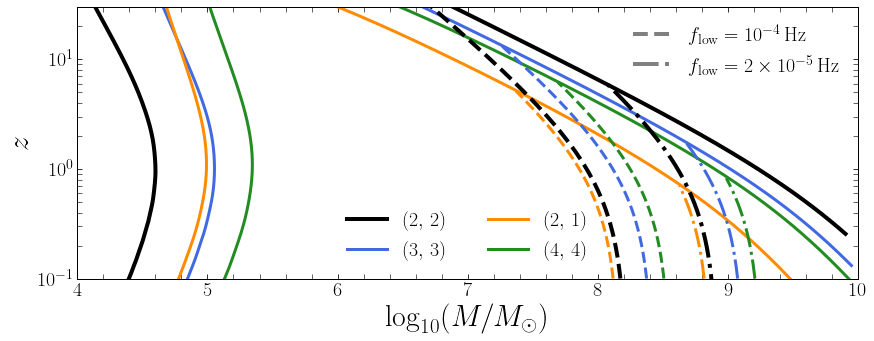

In [25]:
from matplotlib.lines import Line2D

lw1=4
lw2=3
plt.figure(figsize=(14,5))

p1,=plt.plot(hor_22[:,0],hor_22[:,1], color='k', lw=lw1)
p2,=plt.plot(hor_33[:,0],hor_33[:,1], color='royalblue', lw=lw2)
p3,=plt.plot(hor_21[:,0],hor_21[:,1], color='darkorange', lw=lw2)
p4,=plt.plot(hor_44[:,0],hor_44[:,1], color='forestgreen', lw=lw2)

ax=plt.gca()
#ax.legend(handles=[p1,p2,p3,p4],loc=(6,0.5))

custom_lines = [Line2D([0], [0], color='k', lw=lw1),
                Line2D([0], [0], color='royalblue', lw=lw2),
                Line2D([0], [0], color='darkorange', lw=lw2),
                Line2D([0], [0], color='forestgreen', lw=lw2)]

first_legend=plt.legend(custom_lines, [r'$(2,\,2)$', r'$(3,\,3)$', r'$(2,\,1)$', r'$(4,\,4)$'],
          frameon=False, ncol=2, loc='lower center')
ax.add_artist(first_legend)

l_styles=['--','-.']
for i,f_low in enumerate([1e-4, 2e-5]):


    logMzCut_22= np.log10(qnm22(remnant_spin(q))[0]/(2*np.pi*f_low*MS))
    logMzCut_33= np.log10(qnm33(remnant_spin(q))[0]/(2*np.pi*f_low*MS))
    logMzCut_21= np.log10(qnm21(remnant_spin(q))[0]/(2*np.pi*f_low*MS))
    logMzCut_44= np.log10(qnm44(remnant_spin(q))[0]/(2*np.pi*f_low*MS))

    logMcut_22, zcut_22  =trimmed_Mcut(hor_22[:,0][hor_22[:,0]>6], hor_22[:,1][hor_22[:,0]>6], logMzCut_22)
    logMcut_33, zcut_33  =trimmed_Mcut(hor_33[:,0][hor_33[:,0]>6], hor_33[:,1][hor_33[:,0]>6], logMzCut_33)
    logMcut_21, zcut_21  =trimmed_Mcut(hor_21[:,0][hor_21[:,0]>6], hor_21[:,1][hor_21[:,0]>6], logMzCut_21)
    logMcut_44, zcut_44  =trimmed_Mcut(hor_44[:,0][hor_44[:,0]>6], hor_44[:,1][hor_44[:,0]>6], logMzCut_44)

    plt.plot(logMcut_22, zcut_22, ls=l_styles[i], color='k', lw=lw1)
    plt.plot(logMcut_33, zcut_33, ls=l_styles[i], color='royalblue', lw=lw2)
    plt.plot(logMcut_21, zcut_21, ls=l_styles[i], color='darkorange', lw=lw2)
    plt.plot(logMcut_44, zcut_44, ls=l_styles[i], color='forestgreen', lw=lw2)

custom_lines = [Line2D([0], [0], color='grey', lw=lw1,ls='--'),
                Line2D([0], [0], color='grey', lw=lw1, ls= '-.')]

ax.legend(custom_lines, [r'$f_{\rm low}=10^{-4}\,\rm Hz$',r'$f_{\rm low}=2\times10^{-5}\,\rm Hz$'],
          frameon=False, ncol=1, loc='upper right')

plt.ylim(1e-1,30)
plt.xlim(4,10)
plt.yscale('log')
plt.minorticks_on()

plt.xlabel(r"$\log_{10}(M/M_{\odot})$")
plt.ylabel(r"$z$")

plt.savefig('rd_hor.pdf',bbox_inches='tight')

In [26]:
%%time
q=2

logM_list=np.linspace(4,10,601)
logz_list=np.linspace(-1,1,201)
logM_grid, logz_grid= np.meshgrid(logM_list,logz_list)

snr_grid_22=fac*snr( 10**logM_grid, 10**logz_grid, q, Sh_detector, mode='22')
snr_grid_33=fac*snr( 10**logM_grid, 10**logz_grid, q, Sh_detector, mode='33')
snr_grid_21=fac*snr( 10**logM_grid, 10**logz_grid, q, Sh_detector, mode='21')
snr_grid_44=fac*snr( 10**logM_grid, 10**logz_grid, q, Sh_detector, mode='44')

Wall time: 17.1 s


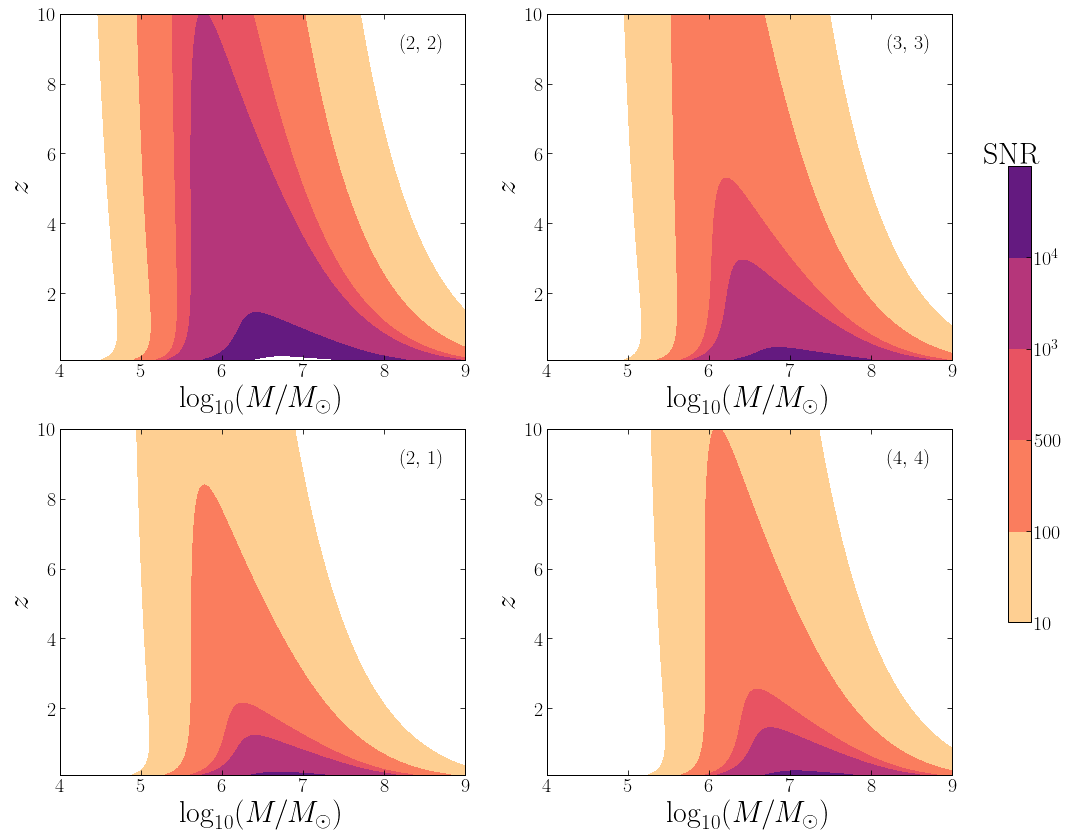

In [27]:
fig, ax= plt.subplots(2,2,figsize=(20,14))

c_range =np.log10([10,100,500,1e3,1e4,1e5])

CS = ax[0,0].contourf(logM_grid, 10**logz_grid, np.log10(snr_grid_22), 
                     levels=c_range,cmap='magma_r', origin='lower', vmin=1, vmax=6)
ax[0,1].contourf(logM_grid, 10**logz_grid, np.log10(snr_grid_33), 
                     levels=c_range,cmap='magma_r', origin='lower', vmin=1, vmax=6)
ax[1,0].contourf(logM_grid, 10**logz_grid, np.log10(snr_grid_21), 
                     levels=c_range,cmap='magma_r', origin='lower', vmin=1, vmax=6)
ax[1,1].contourf(logM_grid, 10**logz_grid, np.log10(snr_grid_44), 
                     levels=c_range,cmap='magma_r', origin='lower', vmin=1, vmax=6)

cb = fig.colorbar(CS, ax=ax,ticks=c_range,shrink=0.6)
cb.ax.set_yticklabels(['10', '100','500',r'$10^3$',r'$10^4$',''])  # vertically oriented colorbar
cb.set_label(label=r"SNR", labelpad=-50, y=1.05, rotation=0)

for axs in ax.flat:
    axs.set_xlabel(r"$\log_{10}(M/M_{\odot})$")
    axs.set_ylabel(r"$z$")
    axs.set_xlim([4,9])
    #axs.set_yscale('log')
ax[0,0].text(8.2, 9, r'$(2,\,2)$', fontsize=20)
ax[0,1].text(8.2, 9, r'$(3,\,3)$', fontsize=20)
ax[1,0].text(8.2, 9, r'$(2,\,1)$', fontsize=20)
ax[1,1].text(8.2, 9, r'$(4,\,4)$', fontsize=20)

plt.savefig('waterfall_rd.pdf',bbox_inches='tight')